#### End-to-end Machine Learning Project

## The Employee Attrition Rate Problem

People may stay in one company all their lives, but they are more likely to switch jobs to other companies. And employee turnover is a loss of cost for a company. Therefore, it is important for a company to understand the underlying factors for employee turnover and the employee attrition rate. For the project, I will use linear regression, random forest, and Gradient boosting models to predict employee attrition rate and give the major factors that affect employee attrition rate. The dataset provided on Kaggle with 24 variables and 7000 employees' information for this project.

In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("/Users/dreama.wmy/Documents/McGill/INSY_695_ML/Train.csv")

## 1 Data Structure

In [2]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [3]:
df.shape

(7000, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [5]:
df.select_dtypes('object').nunique()

Employee_ID                  7000
Gender                          2
Relationship_Status             2
Hometown                        5
Unit                           12
Decision_skill_possess          4
Compensation_and_Benefits       5
dtype: int64

In [6]:
df["Gender"].value_counts()

F    4114
M    2886
Name: Gender, dtype: int64

In [7]:
df["Compensation_and_Benefits"].value_counts()

type2    3945
type3    2382
type4     353
type0     187
type1     133
Name: Compensation_and_Benefits, dtype: int64

In [8]:
df["Hometown"].value_counts()

Lebanon        2070
Springfield    1736
Franklin       1523
Washington     1106
Clinton         565
Name: Hometown, dtype: int64

In [9]:
df["Relationship_Status"].value_counts()

Married    4520
Single     2480
Name: Relationship_Status, dtype: int64

In [10]:
df["Unit"].value_counts()

IT                           1394
Logistics                    1173
Sales                         943
Operarions                    706
R&D                           680
Purchasing                    504
Accounting and Finance        496
Human Resource Management     344
Marketing                     212
Production                    211
Quality                       193
Security                      144
Name: Unit, dtype: int64

In [11]:
df["Decision_skill_possess"].value_counts()

Conceptual    1756
Analytical    1755
Directive     1753
Behavioral    1736
Name: Decision_skill_possess, dtype: int64

In [12]:
df["Compensation_and_Benefits"].value_counts()

type2    3945
type3    2382
type4     353
type0     187
type1     133
Name: Compensation_and_Benefits, dtype: int64

In [13]:
df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


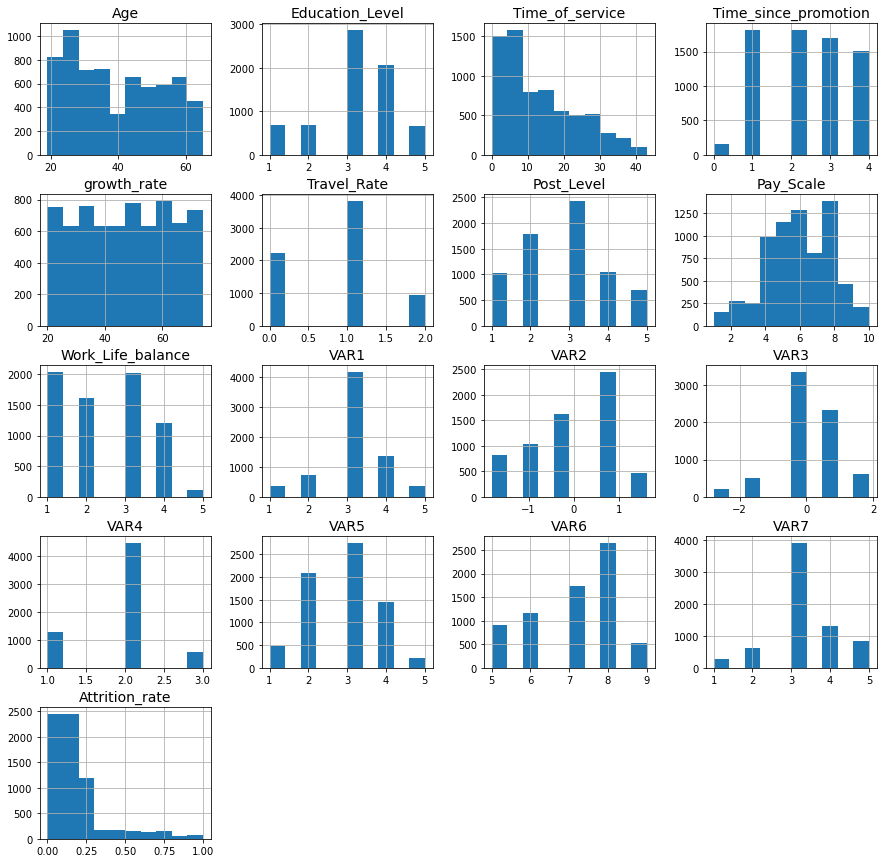

In [14]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(figsize=(15, 15))
plt.show()

In [15]:
df[['Relationship_Status','Attrition_rate']].groupby(['Relationship_Status']).agg('mean')

,Attrition_rate
Relationship_Status,
Married,0.188123
Single,0.191660


In [16]:
df[['Relationship_Status','Attrition_rate']].groupby(['Relationship_Status']).agg('sum')

,Attrition_rate
Relationship_Status,
Married,850.3169
Single,475.3160


In [17]:
df.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

## 2 Split to Test set and Train set

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
train_set.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          325
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              113
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             10
VAR1                           0
VAR2                         470
VAR3                           0
VAR4                         524
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

## 3 Visualize the Variables Relationship 

In [20]:
df2 = train_set.copy()

In [21]:
train_set.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

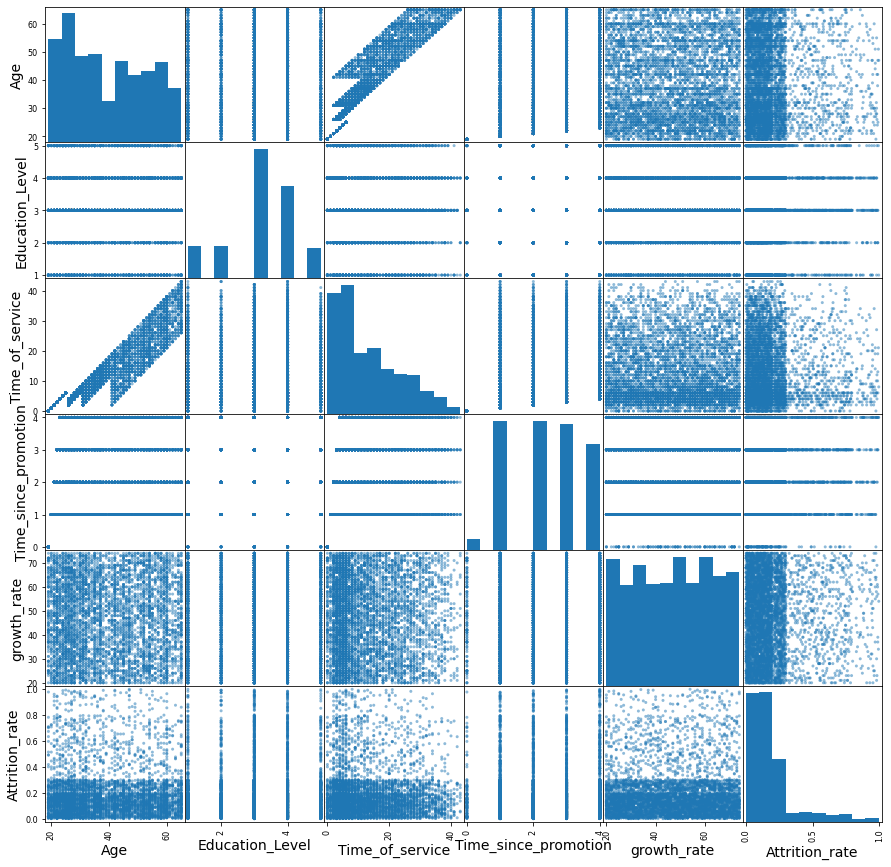

In [22]:
from pandas.plotting import scatter_matrix

attributes = ['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion','growth_rate','Attrition_rate']
scatter_matrix(train_set[attributes], figsize=(15, 15))
plt.show()

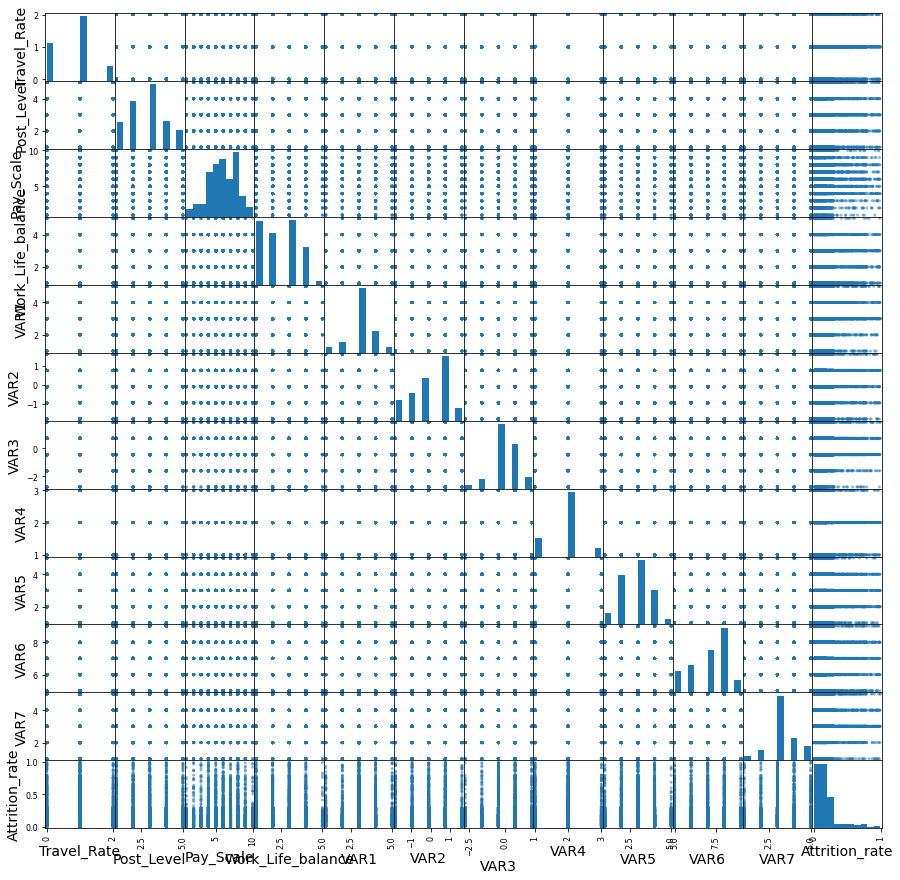

In [23]:
attributes = [ 'Travel_Rate','Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate']
scatter_matrix(train_set[attributes], figsize=(15, 15))
plt.show()

In [24]:
train_set.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Age,1.000000,-0.003909,0.919567,0.140143,-0.000679,0.012870,0.001089,0.023926,-0.006444,0.011222,0.014712,0.003704,0.005868,0.000856,0.007246,0.009061,-0.009475
Education_Level,-0.003909,1.000000,-0.013258,-0.000638,0.003056,-0.007405,0.002975,0.009383,-0.008899,-0.003736,-0.011507,-0.005132,0.004760,0.012506,0.011175,0.008630,-0.020457
Time_of_service,0.919567,-0.013258,1.000000,0.131304,-0.005215,0.003890,-0.003869,0.030241,-0.007323,0.008325,0.013513,0.003803,-0.000990,0.007131,0.021069,0.004568,-0.005066
Time_since_promotion,0.140143,-0.000638,0.131304,1.000000,0.022191,-0.023277,-0.022644,-0.014039,0.000672,-0.000222,0.007046,0.004724,-0.003862,-0.000380,0.011807,0.005518,0.022238
growth_rate,-0.000679,0.003056,-0.005215,0.022191,1.000000,0.010062,-0.004893,-0.005373,-0.017360,-0.004323,0.009783,0.000726,0.023350,-0.011048,-0.011981,-0.015442,0.013897
Travel_Rate,0.012870,-0.007405,0.003890,-0.023277,0.010062,1.000000,0.021455,-0.003760,0.012502,0.031721,0.013925,0.000410,-0.004280,0.004485,-0.014515,-0.014240,-0.009990
Post_Level,0.001089,0.002975,-0.003869,-0.022644,-0.004893,0.021455,1.000000,0.026138,-0.012015,-0.019474,-0.000295,0.007915,-0.013402,0.018775,0.001854,-0.006808,0.025321
Pay_Scale,0.023926,0.009383,0.030241,-0.014039,-0.005373,-0.003760,0.026138,1.000000,-0.012658,0.015913,0.007432,-0.001760,-0.011917,0.015312,-0.003916,-0.003898,-0.014244
Work_Life_balance,-0.006444,-0.008899,-0.007323,0.000672,-0.017360,0.012502,-0.012015,-0.012658,1.000000,-0.010362,0.008626,-0.001161,-0.041823,0.014506,-0.001199,0.019844,0.012012
VAR1,0.011222,-0.003736,0.008325,-0.000222,-0.004323,0.031721,-0.019474,0.015913,-0.010362,1.000000,0.001855,-0.001044,0.004057,0.010786,-0.001669,0.008996,-0.005102


In [25]:
train_set.corr()['Attrition_rate'].sort_values(ascending=False)

Attrition_rate          1.000000
Post_Level              0.025321
Time_since_promotion    0.022238
growth_rate             0.013897
Work_Life_balance       0.012012
VAR5                    0.001355
VAR6                   -0.002080
VAR3                   -0.002582
VAR4                   -0.003927
Time_of_service        -0.005066
VAR1                   -0.005102
Age                    -0.009475
Travel_Rate            -0.009990
Pay_Scale              -0.014244
VAR2                   -0.014485
Education_Level        -0.020457
VAR7                   -0.023250
Name: Attrition_rate, dtype: float64

## 4 Prepare for ML Models

In [26]:
df2 = train_set.drop("Attrition_rate", axis=1)
df2_labels = train_set["Attrition_rate"].copy()

df2 = df2.drop(columns=['Employee_ID'])

### 4.1 Check missing values:

In [27]:
null_rows_idx = df2.isnull().any(axis=1)
df2.loc[null_rows_idx].head(10)

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
6339,F,NaN,2,Single,Springfield,R&D,Conceptual,7.0,3,52,...,6.0,type3,3.0,4,0.7516,-2.7762,2.0,4,8,3
6583,F,NaN,4,Married,Washington,Logistics,Conceptual,3.0,3,20,...,6.0,type2,4.0,2,-0.1048,1.8688,2.0,3,8,5
931,M,58.0,3,Single,Franklin,Logistics,Directive,30.0,3,38,...,4.0,type3,1.0,4,NaN,0.7075,3.0,4,5,3
2287,M,NaN,4,Married,Franklin,Purchasing,Behavioral,38.0,4,55,...,8.0,type2,1.0,3,-1.8176,-1.6150,2.0,3,7,5
2202,F,64.0,1,Single,Franklin,Operarions,Directive,37.0,1,69,...,6.0,type3,4.0,4,NaN,-0.4537,2.0,2,7,4
5796,M,NaN,3,Married,Springfield,Quality,Conceptual,22.0,4,69,...,7.0,type2,3.0,3,-0.9612,-0.4537,2.0,2,5,5
6162,F,44.0,1,Married,Lebanon,Sales,Conceptual,12.0,4,30,...,10.0,type2,2.0,1,NaN,0.7075,2.0,4,8,5
6800,M,65.0,3,Single,Springfield,IT,Analytical,42.0,2,61,...,5.0,type2,2.0,3,NaN,-0.4537,NaN,3,6,3
5985,M,42.0,3,Married,Lebanon,IT,Behavioral,9.0,2,65,...,10.0,type2,1.0,3,1.6081,-0.4537,NaN,3,5,5
4149,F,37.0,3,Married,Springfield,IT,Behavioral,14.0,2,58,...,8.0,type3,3.0,5,0.7516,0.7075,NaN,3,7,3


In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

df2_num = df2.select_dtypes(include=[np.number])

imputer.fit(df2_num)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([37.    ,  3.    , 10.    ,  2.    , 47.    ,  1.    ,  3.    ,
        6.    ,  2.    ,  3.    , -0.1048, -0.4537,  2.    ,  3.    ,
        7.    ,  3.    ])

In [30]:
df2_num.median().values

array([37.    ,  3.    , 10.    ,  2.    , 47.    ,  1.    ,  3.    ,
        6.    ,  2.    ,  3.    , -0.1048, -0.4537,  2.    ,  3.    ,
        7.    ,  3.    ])

In [31]:
X = imputer.transform(df2_num)

imputer.feature_names_in_

array(['Age', 'Education_Level', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4',
       'VAR5', 'VAR6', 'VAR7'], dtype=object)

In [32]:
df2_tr = pd.DataFrame(X, columns=df2_num.columns,
                          index=df2_num.index)

In [33]:
df2_tr.loc[null_rows_idx].head(10)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
6339,37.0,2.0,7.0,3.0,52.0,1.0,3.0,6.0,3.0,4.0,0.7516,-2.7762,2.0,4.0,8.0,3.0
6583,37.0,4.0,3.0,3.0,20.0,1.0,3.0,6.0,4.0,2.0,-0.1048,1.8688,2.0,3.0,8.0,5.0
931,58.0,3.0,30.0,3.0,38.0,2.0,3.0,4.0,1.0,4.0,-0.1048,0.7075,3.0,4.0,5.0,3.0
2287,37.0,4.0,38.0,4.0,55.0,1.0,3.0,8.0,1.0,3.0,-1.8176,-1.6150,2.0,3.0,7.0,5.0
2202,64.0,1.0,37.0,1.0,69.0,0.0,4.0,6.0,4.0,4.0,-0.1048,-0.4537,2.0,2.0,7.0,4.0
5796,37.0,3.0,22.0,4.0,69.0,1.0,4.0,7.0,3.0,3.0,-0.9612,-0.4537,2.0,2.0,5.0,5.0
6162,44.0,1.0,12.0,4.0,30.0,1.0,3.0,10.0,2.0,1.0,-0.1048,0.7075,2.0,4.0,8.0,5.0
6800,65.0,3.0,42.0,2.0,61.0,2.0,3.0,5.0,2.0,3.0,-0.1048,-0.4537,2.0,3.0,6.0,3.0
5985,42.0,3.0,9.0,2.0,65.0,1.0,1.0,10.0,1.0,3.0,1.6081,-0.4537,2.0,3.0,5.0,5.0
4149,37.0,3.0,14.0,2.0,58.0,1.0,2.0,8.0,3.0,5.0,0.7516,0.7075,2.0,3.0,7.0,3.0


In [34]:
imputer.strategy

'median'

### 4.2 Drop outliers:

In [35]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [36]:
outlier_pred

array([-1,  1,  1, ...,  1, -1,  1])

In [37]:
df2.shape

(5600, 22)

In [38]:
df2 = df2.iloc[outlier_pred == 1]
df2_labels = df2_labels.iloc[outlier_pred == 1]

In [39]:
df2.shape

(3650, 22)

### 4.3 Handing Categorical Attributes

In [40]:
df2.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'],
      dtype='object')

In [41]:
df2_cat = df2[["Hometown"]]
df2_cat.head()

,Hometown
6339,Springfield
3886,Lebanon
6583,Washington
1010,Franklin
1539,Franklin


In [42]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df2_cat_encoded = ordinal_encoder.fit_transform(df2_cat)

In [43]:
df2_cat_encoded[:8]

array([[3.],
       [2.],
       [4.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.]])

In [44]:
ordinal_encoder.categories_

[array(['Clinton', 'Franklin', 'Lebanon', 'Springfield', 'Washington'],
       dtype=object)]

In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df2_cat_1hot = cat_encoder.fit_transform(df2_cat)

In [46]:
df2_cat_1hot

<3650x5 sparse matrix of type '<class 'numpy.float64'>'
	with 3650 stored elements in Compressed Sparse Row format>

In [47]:
df2_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [48]:
cat_encoder = OneHotEncoder(sparse=False)
df2_cat_1hot = cat_encoder.fit_transform(df2_cat)
df2_cat_1hot

/Users/dreama.wmy/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [49]:
cat_encoder.categories_

[array(['Clinton', 'Franklin', 'Lebanon', 'Springfield', 'Washington'],
       dtype=object)]

In [50]:
df_test = pd.DataFrame({"Hometown": ['Franklin', 'Lebanon', 'Springfield', 'Washington']})
pd.get_dummies(df_test)

,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [51]:
#make categrical data to dummy variables
df3 = pd.get_dummies(df2, columns = ["Gender","Compensation_and_Benefits",'Relationship_Status','Hometown',
                                    'Unit','Decision_skill_possess','Compensation_and_Benefits'], drop_first = True) 

### 4.4 Feature Scaling

In [52]:
# Standardize predictors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2_num_std_scaled = scaler.fit_transform(df2_num)
#X_test2 = scaler.fit_transform(X_test)

## 5 Transformation Pipelines

In [53]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [54]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [55]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [56]:
df2_num_prepared = num_pipeline.fit_transform(df2_num)
df2_num_prepared[:2].round(2)

array([[-1.54, -0.17, -1.29, -2.07, -0.32,  0.29, -0.69,  1.94, -0.35,
         1.07, -0.1 , -2.79,  0.19, -0.89, -1.82, -1.36],
       [-0.18, -1.1 , -0.61,  0.55,  0.32,  0.29,  0.17, -0.  ,  0.54,
         1.07,  0.81, -2.79,  0.19,  1.23,  0.76, -0.28]])

In [57]:
def monkey_patch_get_signature_names_out():
    
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [59]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [60]:
df_df2_num_prepared = pd.DataFrame(
    df2_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=df2_num.index)

In [61]:
df_df2_num_prepared.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
1032,-1.537773,-0.169398,-1.289317,-2.072616,-0.316927,0.292693,-0.687805,1.939116,-0.352527,1.068604,-0.100810,-2.787691,0.193712,-0.889556,-1.819523,-1.355561
6339,-0.178833,-1.102171,-0.608398,0.549763,0.317925,0.292693,0.172335,-0.001906,0.541158,1.068604,0.806737,-2.787691,0.193712,1.231139,0.762451,-0.276814
3886,0.047657,0.763374,0.461618,0.549763,-0.634353,-1.262413,1.892615,-0.001906,0.541158,-1.319338,0.806737,0.729347,0.193712,1.231139,-0.098207,0.801933
2653,-1.311283,0.763374,-0.997495,0.549763,1.524143,1.847800,-0.687805,0.968605,-1.246212,1.068604,0.806737,-0.442965,0.193712,1.231139,-0.958865,0.801933
6914,0.727127,1.696147,0.461618,0.549763,-1.650116,0.292693,-0.687805,0.483349,-0.352527,-1.319338,-1.008356,1.901760,0.193712,1.231139,-0.098207,-1.355561


In [62]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [63]:
df2.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'],
      dtype='object')

In [64]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Age', 'Education_Level', 'Time_of_service','Time_since_promotion', 'growth_rate', 
               'Travel_Rate', 'Post_Level','Pay_Scale', 'Work_Life_balance', 'VAR1','VAR2', 'VAR3', 'VAR4',
               'VAR5', 'VAR6', 'VAR7']

cat_attribs = ["Gender","Compensation_and_Benefits",'Relationship_Status','Hometown','Unit',
               'Decision_skill_possess']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [65]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [66]:
df2_prepared = preprocessing.fit_transform(df2)

In [67]:
df2_prepared_fr = pd.DataFrame(
    df2_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=df2.index)
df2_prepared_fr.head(2)

,pipeline-1__Age,pipeline-1__Education_Level,pipeline-1__Time_of_service,pipeline-1__Time_since_promotion,pipeline-1__growth_rate,pipeline-1__Travel_Rate,pipeline-1__Post_Level,pipeline-1__Pay_Scale,pipeline-1__Work_Life_balance,pipeline-1__VAR1,...,pipeline-2__Unit_Security,pipeline-2__Decision_skill_possess_Analytical,pipeline-2__Decision_skill_possess_Behavioral,pipeline-2__Decision_skill_possess_Conceptual,pipeline-2__Decision_skill_possess_Directive,pipeline-2__Compensation_and_Benefits_type0,pipeline-2__Compensation_and_Benefits_type1,pipeline-2__Compensation_and_Benefits_type2,pipeline-2__Compensation_and_Benefits_type3,pipeline-2__Compensation_and_Benefits_type4
6339,-0.158180,-1.253154,-0.539554,0.546372,0.309658,0.343368,0.228456,-0.021772,0.552576,1.313301,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3886,0.174255,0.835913,0.690046,0.546372,-0.667505,-1.357164,2.085614,-0.021772,0.552576,-1.536609,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
df2_prepared_fr.columns

Index(['pipeline-1__Age', 'pipeline-1__Education_Level',
       'pipeline-1__Time_of_service', 'pipeline-1__Time_since_promotion',
       'pipeline-1__growth_rate', 'pipeline-1__Travel_Rate',
       'pipeline-1__Post_Level', 'pipeline-1__Pay_Scale',
       'pipeline-1__Work_Life_balance', 'pipeline-1__VAR1', 'pipeline-1__VAR2',
       'pipeline-1__VAR3', 'pipeline-1__VAR4', 'pipeline-1__VAR5',
       'pipeline-1__VAR6', 'pipeline-1__VAR7', 'pipeline-2__Gender_F',
       'pipeline-2__Gender_M', 'pipeline-2__Relationship_Status_Married',
       'pipeline-2__Relationship_Status_Single',
       'pipeline-2__Hometown_Clinton', 'pipeline-2__Hometown_Franklin',
       'pipeline-2__Hometown_Lebanon', 'pipeline-2__Hometown_Springfield',
       'pipeline-2__Hometown_Washington',
       'pipeline-2__Unit_Accounting and Finance',
       'pipeline-2__Unit_Human Resource Management', 'pipeline-2__Unit_IT',
       'pipeline-2__Unit_Logistics', 'pipeline-2__Unit_Marketing',
       'pipeline-2__Unit_Op

In [69]:
from sklearn.preprocessing import FunctionTransformer

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())


default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
        ("log", log_pipeline, ['Age']), #log the age 
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),#dummy categry
    ],
    remainder=default_num_pipeline) 

In [70]:
df2_prepared = preprocessing.fit_transform(df2)
df2_prepared.shape

(3650, 46)

In [71]:
preprocessing.get_feature_names_out()

array(['log__Age', 'cat__Gender_F', 'cat__Gender_M',
       'cat__Relationship_Status_Married',
       'cat__Relationship_Status_Single', 'cat__Hometown_Clinton',
       'cat__Hometown_Franklin', 'cat__Hometown_Lebanon',
       'cat__Hometown_Springfield', 'cat__Hometown_Washington',
       'cat__Unit_Accounting and Finance',
       'cat__Unit_Human Resource Management', 'cat__Unit_IT',
       'cat__Unit_Logistics', 'cat__Unit_Marketing',
       'cat__Unit_Operarions', 'cat__Unit_Production',
       'cat__Unit_Purchasing', 'cat__Unit_Quality', 'cat__Unit_R&D',
       'cat__Unit_Sales', 'cat__Unit_Security',
       'cat__Decision_skill_possess_Analytical',
       'cat__Decision_skill_possess_Behavioral',
       'cat__Decision_skill_possess_Conceptual',
       'cat__Decision_skill_possess_Directive',
       'cat__Compensation_and_Benefits_type0',
       'cat__Compensation_and_Benefits_type1',
       'cat__Compensation_and_Benefits_type2',
       'cat__Compensation_and_Benefits_type3',
  

## 6 Build Models

### 6.1 Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(df2, df2_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbe7b180f70>)])),
                ('linearregression', LinearRegression())])

In [73]:
df2_predictions = lin_reg.predict(df2)
df2_predictions[:5] 

array([0.20724487, 0.18984985, 0.1857605 , 0.177948  , 0.19042969])

In [74]:
df2_labels.iloc[:5].values

array([0.1408, 0.1698, 0.0959, 0.1946, 0.1941])

In [75]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(df2_labels, df2_predictions,
                              squared=False)
lin_rmse

0.18236458858263502

### 6.2 Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

rf = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
model_rf  = rf.fit(df2, df2_labels)
model_rf 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbe7b180f70>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [77]:
df2_predictions = rf.predict(df2)
tree_rmse = mean_squared_error(df2_labels, df2_predictions,
                              squared=False)
tree_rmse

0.07012713335365346

### 6.3 Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

gbt_reg = make_pipeline(preprocessing, GradientBoostingRegressor())
model_gbt = gbt_reg.fit(df2, df2_labels)
model_gbt

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbe7b180f70>)])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [79]:
df2_predictions = gbt_reg.predict(df2)

from sklearn.metrics import mean_squared_error

gbt_rmse = mean_squared_error(df2_labels, df2_predictions,
                              squared=False)
gbt_rmse

0.16950181550781768

## 7 Cross-Validation

### Random Forest

In [80]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(rf, df2, df2_labels,
                              scoring="neg_root_mean_squared_error", cv=10)


In [81]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      0.187674
std       0.012203
min       0.173982
25%       0.178429
50%       0.187100
75%       0.190635
max       0.215373
dtype: float64

### Linear Regression

In [82]:
lin_rmses = -cross_val_score(lin_reg, df2, df2_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    10.000000
mean      0.184318
std       0.012648
min       0.171307
25%       0.174958
50%       0.183044
75%       0.187470
max       0.215152
dtype: float64

### Boosting

In [83]:
gbt_rmses = -cross_val_score(gbt_reg, df2, df2_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(gbt_rmses).describe()

count    10.000000
mean      0.186603
std       0.012205
min       0.173116
25%       0.177762
50%       0.185858
75%       0.190369
max       0.215654
dtype: float64

## 8 Fine-Tune for Models

### for Random Forest

In [84]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'random_forest__min_samples_split': [2, 3,4,5],
     'random_forest__max_features': [4, 6, 8]}
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(df2, df2_labels)

grid_search.best_params_

{'random_forest__max_features': 4, 'random_forest__min_samples_split': 4}

In [85]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(df2, df2_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('log',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out='...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fbe7b180f70>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbe7c5cc460>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [86]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[[
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = [ "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols]
cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
9,4,0.194894,0.178450,0.184154,0.185833
7,5,0.195541,0.178364,0.183975,0.185960
2,12,0.195573,0.178695,0.184905,0.186391
5,12,0.195573,0.178695,0.184905,0.186391
6,12,0.195573,0.178695,0.184905,0.186391


### for Gradient Boosting

In [87]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("boost", GradientBoostingRegressor(random_state=42)),
])
param_grid = [
    {
     'boost__learning_rate': [0.01, 0.1, 0.2],
    'boost__max_features': [4, 6, 8]}
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(df2, df2_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('log',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fbe7b180f70>)])),
                                       ('boost',
                                        GradientBoostingRegressor(random_state=42))]),
             param_grid=[{'boost__learning_rate': [0.01, 0.1, 0.2],
                          'boost__max_features': [4, 6, 8]}],
             scoring='neg_root_mean_squared_error')

In [88]:
grid_search.best_params_

{'boost__learning_rate': 0.01, 'boost__max_features': 4}

In [89]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res = cv_res[[
                 "param_boost__learning_rate",'param_boost__max_features',"split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = [ 'learning_rate',"max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols]

cv_res.head()

,learning_rate,max_features,split0,split1,split2,mean_test_rmse
0,0.01,4,0.193201,0.176630,0.181277,0.183703
1,0.01,6,0.193192,0.176708,0.181399,0.183766
2,0.01,8,0.193269,0.176808,0.181484,0.183853
3,0.1,4,0.194784,0.178301,0.183843,0.185643
4,0.1,6,0.195154,0.178958,0.184145,0.186086


## Randomized Search

In [90]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'boost__learning_rate': [0.01,0.1],
    'boost__max_depth': randint(low=1, high=10),
                  'boost__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(df2, df2_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('log',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out='...
                                              GradientBoostingRegressor(random_state=42))]),
                   param_distributions={'boost__learning_rate': [0.01, 0.1],
                                        'boost__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbe803e34c0>,
                                        'boost__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbe803d9760>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [91]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[[
                 'param_boost__learning_rate', "param_boost__max_depth","param_boost__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = [ 'learning_rate',"max_depth","max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols]
cv_res.head()

,learning_rate,max_depth,max_features,split0,split1,split2,mean_test_rmse
9,0.01,1,11,0.193118,0.176678,0.181220,0.183672
0,0.01,4,16,0.193434,0.177038,0.182233,0.184235
3,0.01,8,5,0.193513,0.177230,0.182410,0.184384
1,0.01,8,8,0.193988,0.177144,0.182400,0.184511
7,0.1,5,2,0.196372,0.179346,0.184186,0.186634


#### We find that Gradient Boosting with learning rate = 0.01, max depth = 1, and max features = 11 is the best model with mean test score of 0.183672.

## 9 Analyze the Best Model and Errors

In [92]:
final_model = rnd_search.best_estimator_  
feature_importances = final_model["boost"].feature_importances_
feature_importances

array([0.09467557, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01571849, 0.        , 0.        ,
       0.00440457, 0.        , 0.0226709 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.10355862, 0.        , 0.        , 0.        ,
       0.        , 0.01719468, 0.02732741, 0.00778247, 0.        ,
       0.        , 0.05601674, 0.09298519, 0.30118487, 0.18325885,
       0.        , 0.        , 0.00789119, 0.        , 0.        ,
       0.06533046])

In [93]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.30118487446205683, 'remainder__Work_Life_balance'),
 (0.18325884723892813, 'remainder__VAR1'),
 (0.103558616891631, 'cat__Compensation_and_Benefits_type0'),
 (0.09467556581799302, 'log__Age'),
 (0.09298519233641434, 'remainder__Pay_Scale'),
 (0.06533046242373243, 'remainder__VAR7'),
 (0.05601674221223025, 'remainder__Post_Level'),
 (0.02732740597815444, 'remainder__Time_of_service'),
 (0.02267090473098058, 'cat__Unit_Purchasing'),
 (0.01719467518282706, 'remainder__Education_Level'),
 (0.015718486275436934, 'cat__Unit_IT'),
 (0.007891185436755675, 'remainder__VAR4'),
 (0.007782468867033675, 'remainder__Time_since_promotion'),
 (0.00440457214582563, 'cat__Unit_Operarions'),
 (0.0, 'remainder__growth_rate'),
 (0.0, 'remainder__VAR6'),
 (0.0, 'remainder__VAR5'),
 (0.0, 'remainder__VAR3'),
 (0.0, 'remainder__VAR2'),
 (0.0, 'remainder__Travel_Rate'),
 (0.0, 'cat__Unit_Security'),
 (0.0, 'cat__Unit_Sales'),
 (0.0, 'cat__Unit_R&D'),
 (0.0, 'cat__Unit_Quality'),
 (0.0, 'cat__Unit_Productio

## 10 Evaluate System on the Test Set

In [94]:
X_test = test_set.drop("Attrition_rate", axis=1)
y_test = test_set["Attrition_rate"].copy()

X_test = X_test.drop(columns=['Employee_ID'])

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

0.18652558303337813


95% confidence interval for the test RMSE:

In [95]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
CI = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

print('We are 95% confidence that the test RMSE is between', CI[0], 'and', CI[1])

We are 95% confidence that the test RMSE is between 0.17364371015342958 and 0.1985735334228482


## 11 Model persistence using joblib

In [96]:
import joblib

joblib.dump(final_model, "boost_model.pkl")

['boost_model.pkl']

In [97]:
final_model_reloaded = joblib.load("boost_model.pkl")
new_data = df2.iloc[:5]  
predictions = final_model_reloaded.predict(new_data)
predictions

array([0.18944212, 0.19032467, 0.18806879, 0.18927554, 0.18944212])

END. Thank you!